<div align="right"><a href="https://github.com/lucasliano/TC2">TCII Github</a></div>

<div align="center">
    <h1>Trabajo Semanal</h1>
    <h2>Filtros Activos de 2do Orden:</h2>
    <h2>Âckerberg-Mossberg</h2>
    <h3>Liaño, Lucas</h3>
</div>

## Consigna 


![Consigna Obligatoria](Consigna.png)


## Resolución a Mano

### Consignas Obligatorias

![obligatorio1](obligatorio1.png)
![obligatorio2](obligatorio2.png)

### Bonus

#### Salida Pasa-Banda + Sensibilidad

![bonus1](bonus1.png)

#### Simulación circuital
![Simulación](Simulacion.png)

El primer gráfico se corresponde con la salida para bajos, mientras que el segundo con la salida pasa banda.

<div class="alert alert-warning">
    <strong>Nota:</strong> Ver sección de discusión al final del notebook.
</div>


#### Normalización

#### Transferencia Butterworth
<div class="alert alert-danger">
    <strong>Nota:</strong> No sé como resolver esto.
</div>


## Implementación Computarizada

En esta sección vamos a encontrar el código de python correspondiente para generar el diagrama de bode y diagrama de polos y ceros para la transferencia del filtro pasa bajos y el filtro pasa banda.

#### Importamos las librerias a utilizar

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from splane import pzmap, grpDelay, bodePlot, convert2SOS
from scipy import signal

# Módulos para Jupyter (mejores graficos!)
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 150 # 200 e.g. is really fine, but slower

#### Inicializamos las variables utilizadas

Cargamos los valores de los componentes del circuitos que aparecen en la expresión de la transferencia.

In [6]:
# Constantes del circuito
R1 = 100  #100
R2 = 10e3 #10k
R3 = 1e3  #1k
C = 1e-3  #1mf

# Constantes del filtro
wo = 1/(R3*C)
Q = R2/R3
K = -R3/R1

### Definimos la transferencia a partir de la expresión hallada

#### Pasa Bajos
$ T_{L}(s) = K \cdot \dfrac{\omega_{0}^2}{s^2 + s(\frac{\omega_{0}}{Q}) + \omega_{0}^2}$
#### Pasa Banda
$ T_{B}(s) = KR_{3}C  \cdot \dfrac{s \ \omega_{0}^2}{s^2 + s\ (\frac{\omega_{0}}{Q}) + \omega_{0}^2}$

In [10]:
# Genero la función transferencia pasa bajos en S
num_pasa_bajos = [K * (wo**2)]
den_pasa_bajos = [1, wo/Q, wo**2]
TL = signal.TransferFunction(num_pasa_bajos, den_pasa_bajos);


# Genero la función transferencia pasa banda en S
num_pasa_banda = [K * (wo**2) * (R3*C), 0]
den_pasa_banda = [1, wo/Q, wo**2]
TB = signal.TransferFunction(num_pasa_banda, den_pasa_banda);

### Diagrama de polos y ceros

#### Pasa Bajos

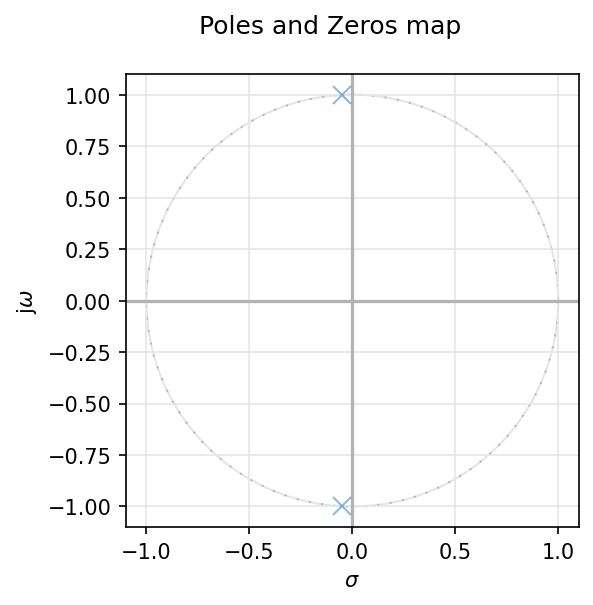

In [20]:
pzmap(TL, 1);

#### Pasa Banda

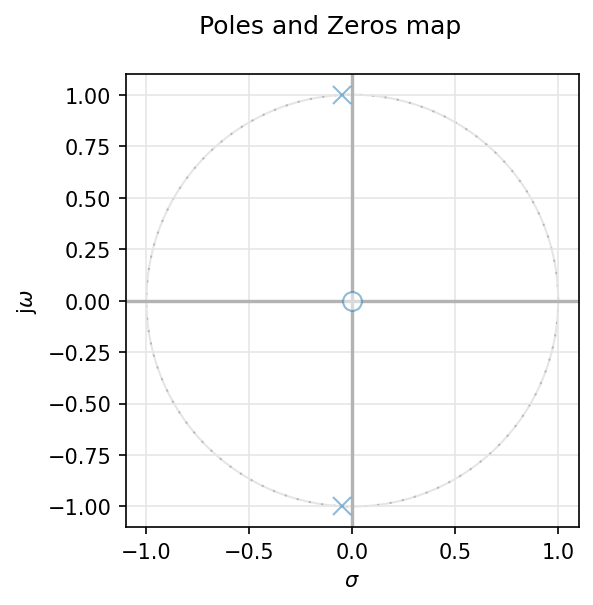

In [21]:
pzmap(TB, 1);

### Diagrama de Bode

#### Pasa Bajos

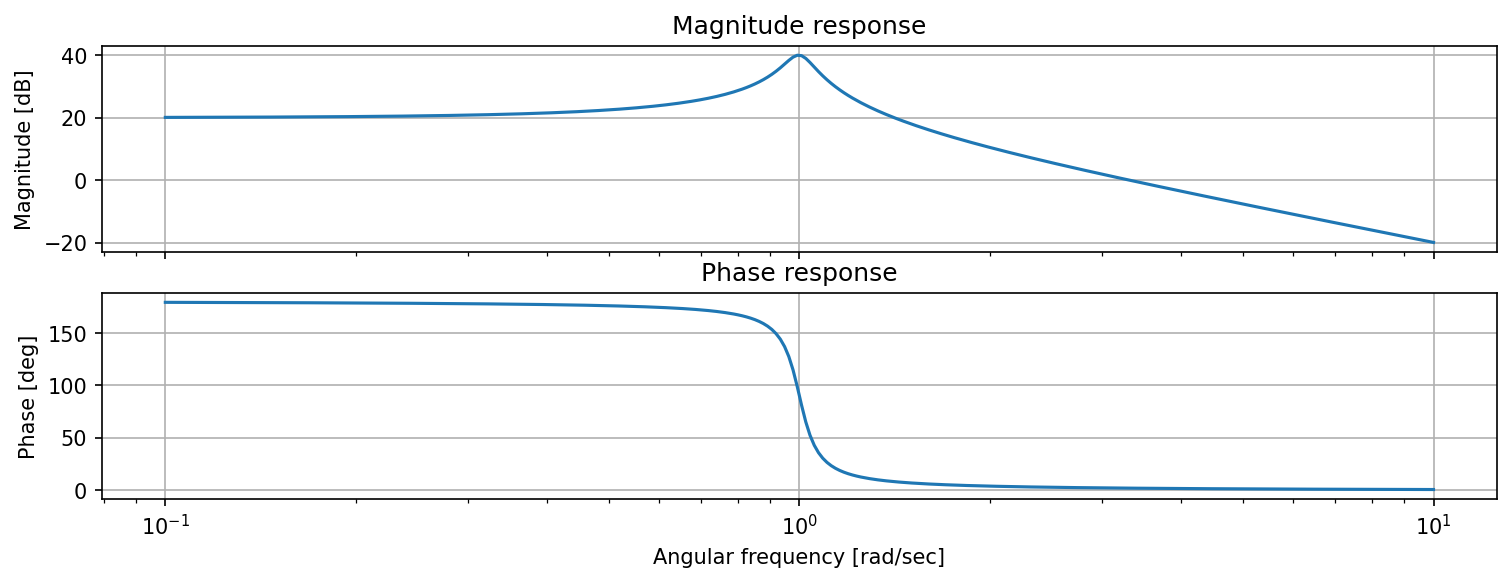

In [22]:
bodePlot(TL, 2);

#### Pasa Banda

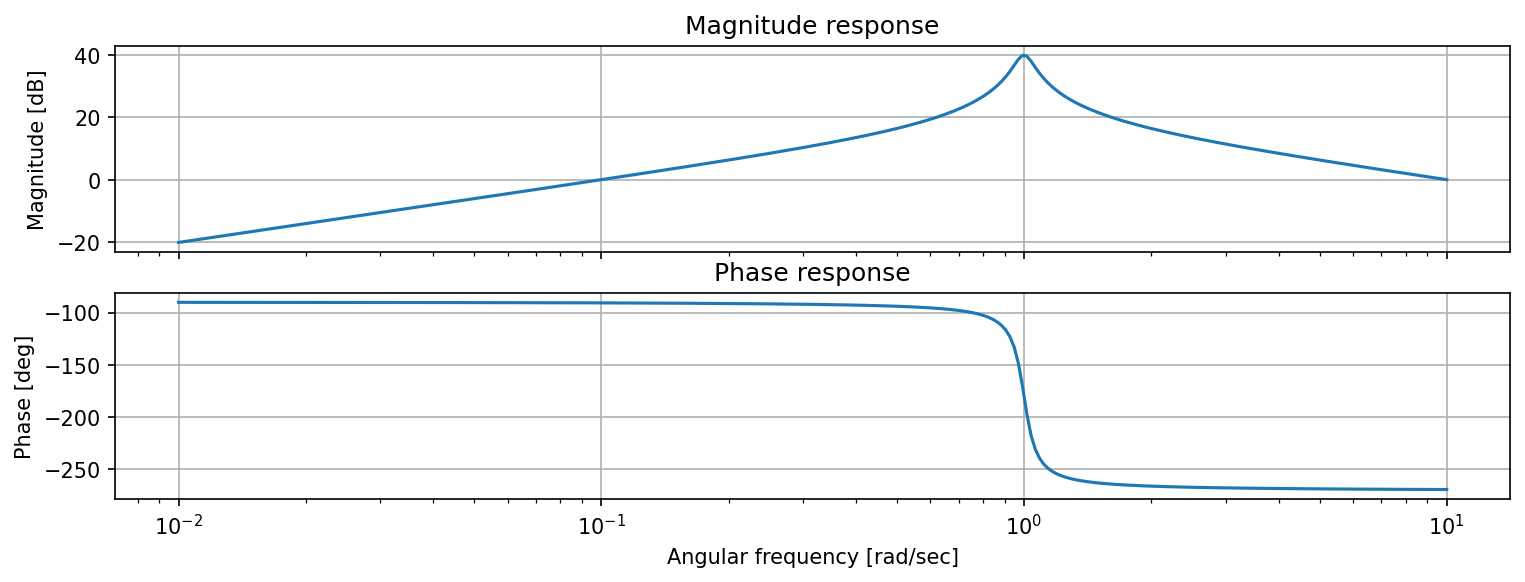

In [23]:
bodePlot(TB, 2);

## Discusión

Como podemos observar en el apartado de simulación circuital, el resultado obtenido no tiene la misma frecuencia. Esto se debe a que en el caso del bode, estamos graficando frecuencia angular en el eje X, mientras que en LTspice estamos graficando frecuencia $f = \frac{\omega_{0}}{2\pi}$. Podemos verificar que $f = \frac{1Hz}{2\pi} = 159.15mHz$